作业一题目: 验证高斯平滑的效果

In [93]:
image_name = 'cat'

In [94]:
#### 前置工作
import cv2 as cv
import numpy as np
# 给图片加白噪声

image = cv.imread(f"{image_name}.jpg", cv.IMREAD_UNCHANGED)

height, width, channel = image.shape

for i in range(2000):
    x = np.random.randint(0, height)
    y = np.random.randint(0, width)
    image[x, y, :] = 255

cv.imwrite(f"{image_name}_white_noise.jpg", image)

rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

org_image = cv.imread(f"{image_name}.jpg", cv.IMREAD_UNCHANGED)
org_rgb_image = cv.cvtColor(org_image, cv.COLOR_BGR2RGB)



In [95]:
import matplotlib.pyplot as plt	

def show_image(image):
    plt.imshow(image)

def save_iamge(image, name='temp.jpg'):
    cv.imwrite(name, cv.cvtColor(image, cv.COLOR_BGR2RGB))

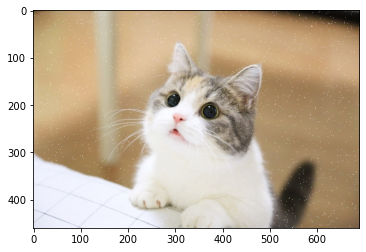

In [96]:
#### 平移

move_left_kernel = np.array([[0,0,0],[0,0,1],[0,0,0]])
move_right_kernel = np.array([[0,0,0],[1,0,0],[0,0,0]])

show_image(cv.filter2D(rgb_image, -1, move_left_kernel))
show_image(cv.filter2D(rgb_image, -1, move_right_kernel))


In [97]:
#### 提取边缘 
extract_kernel = np.array([[0,0,0],[1,0,-1],[0,0,0]])
image1 = cv.filter2D(org_rgb_image, -1, extract_kernel)

save_iamge(image1)



In [98]:
#### 锐化
average_kernel = np.ones((3, 3), dtype=np.float32)/9
image1 = cv.filter2D(org_rgb_image, -1, average_kernel)

image2 = org_rgb_image - image1 + org_rgb_image

save_iamge(image2)

In [99]:
#### 不同核大小和方差的高斯卷积核测试
image3 = cv.GaussianBlur(rgb_image, (7, 7), 0)

save_iamge(image3)

In [100]:
#### 中值滤波
image4 = cv.medianBlur(rgb_image, 3)

save_iamge(image4)
